<a href="https://colab.research.google.com/github/Mariolh33/G2_100472188_100429058/blob/main/Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero al igual que para regresión importaremos los datos wind_ava y los limpiaremos con todo lo relevante mencionado en el EDA.

In [1]:
import pickle
import pandas as pd
import requests
from io import BytesIO
import gzip

# URL del archivo CSV comprimido
url_datos = 'https://github.com/Mariolh33/G2_100472188_100429058/raw/main/wind_ava.csv.gz'

# Descargar el archivo CSV comprimido
response = requests.get(url_datos)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Descomprimir el archivo y cargarlo en un DataFrame
    with gzip.open(BytesIO(response.content), 'rt') as file:
        X = pd.read_csv(file)
else:
    print("Error al descargar el archivo.")


In [2]:

# Seleccionar las variables a mantener y eliminar
variables_a_eliminar = {'lai_lv.13', 'v100.13', 'v10.13', 'u10.13'}
columnas_a_mantener = ['datetime'] + ["energy"] + [col for col in X.columns if col.endswith('13') and col not in variables_a_eliminar]

# Filtrar el DataFrame para mantener solo las columnas seleccionadas
X = X[columnas_a_mantener]



In [3]:
X

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.432983,-0.757587,-1.922799,99846.319914,280.960661,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.432838,-1.412620,-1.403011,99917.733093,279.296651,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.432704,-2.290185,-0.754580,99764.378681,278.233956,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.432514,-3.497855,1.271028,99672.670459,280.787263,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.432369,-0.971249,0.553060,99372.811211,279.583112,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.434994,4.595786,5.563189,95460.434452,281.680110,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743
4744,2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.434849,4.894838,5.577096,95663.765406,282.842686,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887
4745,2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.434715,0.958361,0.948029,95653.110509,282.027412,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799
4746,2009-12-31 12:00:00,516.96,2.371697e+06,13.048144,12.580268,1.376913e+06,2.434291,5.278912,0.771754,95534.765044,280.814135,279.662858,281.153379,281.976385,0.705886,0.192834,285.904895,0.426707,-5.693542,8.374951


Ahora como se trata de clasificacion debemos crear una nueva columna que haga de etiqueta con la que el modelo pueda entrenar. Una vez creada dicha columna eliminaremos la columna energia ya que sería erroneo entrenar los datos con el valor de la energía.

In [4]:
tercer_cuantil=X["energy"].quantile(0.75)
print(tercer_cuantil)
X['clase'] = 'baja'  # Inicializamos todas las filas como "baja"
X.loc[X['energy'] >= tercer_cuantil, 'clase'] = 'alta'  # Actualizamos las filas donde la energía es mayor o igual que el tercer cuantil a "alta"
X = X.drop(['energy'], axis=1)
y=X["clase"]

1089.375


In [5]:
X

,datetime,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,clase
0,2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.432983,-0.757587,-1.922799,99846.319914,280.960661,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,baja
1,2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.432838,-1.412620,-1.403011,99917.733093,279.296651,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,baja
2,2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.432704,-2.290185,-0.754580,99764.378681,278.233956,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,alta
3,2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.432514,-3.497855,1.271028,99672.670459,280.787263,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,alta
4,2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.432369,-0.971249,0.553060,99372.811211,279.583112,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,2.385772e+06,14.413342,24.971074,3.905586e+06,2.434994,4.595786,5.563189,95460.434452,281.680110,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,alta
4744,2009-12-30 12:00:00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.434849,4.894838,5.577096,95663.765406,282.842686,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,baja
4745,2009-12-30 18:00:00,2.379049e+06,10.915997,3.145067,2.254171e+06,2.434715,0.958361,0.948029,95653.110509,282.027412,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,baja
4746,2009-12-31 12:00:00,2.371697e+06,13.048144,12.580268,1.376913e+06,2.434291,5.278912,0.771754,95534.765044,280.814135,279.662858,281.153379,281.976385,0.705886,0.192834,285.904895,0.426707,-5.693542,8.374951,baja


In [6]:
train_years = [2004,2005,2006,2007]
test_years = [2008, 2009]
X['datetime'] = pd.to_datetime(X['datetime'])

X_train = X[X['datetime'].dt.year.isin(train_years)].drop(['datetime',"clase"], axis=1)
y_train = y[X['datetime'].dt.year.isin(train_years)]
X_test = X[X['datetime'].dt.year.isin(test_years)].drop(['datetime',"clase"], axis=1)
y_test = y[X['datetime'].dt.year.isin(test_years)]

In [7]:
X_train

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13
0,2.510824e+06,9.186295,13.527577,1.386937e+06,2.432983,-0.757587,-1.922799,99846.319914,280.960661,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562
1,2.513173e+06,8.849569,6.896412,1.153526e+06,2.432838,-1.412620,-1.403011,99917.733093,279.296651,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344
2,2.509627e+06,7.924080,4.774439,1.098754e+06,2.432704,-2.290185,-0.754580,99764.378681,278.233956,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203
3,2.510571e+06,6.922709,0.000000,1.076021e+06,2.432514,-3.497855,1.271028,99672.670459,280.787263,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835
4,2.505664e+06,6.646282,0.000000,1.070830e+06,2.432369,-0.971249,0.553060,99372.811211,279.583112,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,2.486967e+06,14.540038,3.372421,7.898070e+05,2.435743,1.405276,3.526803,98798.968893,277.860796,279.156312,278.170450,280.123223,0.151948,0.296946,285.119415,0.411728,-5.965750,3.320997
3645,2.483750e+06,17.954048,6.214349,1.236580e+06,2.435553,2.065853,2.989283,98777.405410,278.656803,280.162409,278.420992,280.122669,0.212110,0.252113,285.093529,0.418910,-5.861108,4.201947
3646,2.487306e+06,16.126784,15.384304,1.591171e+06,2.435408,1.942018,2.280355,98882.812786,280.224988,282.428750,278.940637,280.138158,0.176492,0.176413,285.066677,0.428308,-5.699800,3.495199
3647,2.488743e+06,9.857037,0.000000,3.961953e+05,2.434291,-2.132711,-0.709033,98673.900695,281.205547,282.174020,279.764954,280.475323,-0.124236,-0.016549,284.871176,0.414268,-5.889407,-2.579904


SVC sin ajuste

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import time

inner = TimeSeriesSplit(n_splits=3)
inner_scores = {}

# Definir el pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(random_state=42))])

# Definir los parámetros para la búsqueda en rejilla
param_grid_svc = {

}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(pipeline, param_grid_svc, cv=inner, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = (time.time() - start_time)*1000
print(f"F1 score inner: {grid_search.best_score_}")

# Hacer predicciones con el mejor modelo obtenido con grid search
y_pred = grid_search.predict(X_test)
print(y_pred[56:70])
# Imprimir los resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
f1_score = metrics.balanced_accuracy_score(y_test, y_pred) # O 'macro' según lo desees
print(f"balanced_accuracy outer: {f1_score}")
print(f"Training time: {training_time} ms")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
F1 score inner: 0.7984545185236794
['alta' 'alta' 'alta' 'baja' 'alta' 'alta' 'alta' 'alta' 'alta' 'baja'
 'baja' 'baja' 'baja' 'baja']
Mejores parámetros: {}
balanced_accuracy outer: 0.8033785535297675
Training time: 4077.495336532593 ms


SVC con ajuste

In [9]:

# Definir el pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(random_state=42))])

# Definir los parámetros para la búsqueda en rejilla
param_grid_svc = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(pipeline, param_grid_svc, cv=inner, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = (time.time() - start_time)*1000
print(f"F1 score inner: {grid_search.best_score_}")

# Hacer predicciones con el mejor modelo obtenido con grid search
y_pred = grid_search.predict(X_test)
print(y_pred[56:70])
# Imprimir los resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
f1_score = metrics.balanced_accuracy_score(y_test, y_pred) # O 'macro' según lo desees
print(f"balanced_accuracy outer: {f1_score}")
print(f"Training time: {training_time} ms")




Fitting 3 folds for each of 12 candidates, totalling 36 fits
F1 score inner: 0.7984545185236794
['alta' 'alta' 'alta' 'baja' 'alta' 'alta' 'alta' 'alta' 'alta' 'baja'
 'baja' 'baja' 'baja' 'baja']
Mejores parámetros: {'model__C': 1, 'model__kernel': 'rbf'}
balanced_accuracy outer: 0.8033785535297675
Training time: 14758.543252944946 ms


RandomForest sin ajuste

In [10]:
# Definir el pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestClassifier(random_state=42))])

# Definir los parámetros para la búsqueda en rejilla
param_grid = {

}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(pipeline, param_grid, cv=inner, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = (time.time() - start_time)*1000

# Hacer predicciones con el mejor modelo obtenido con grid search
y_pred = grid_search.predict(X_test)
print(y_pred[56:70])
# Imprimir los resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
print(f"balanced_accuracy outer: {accuracy}")
print(f"Training time: {training_time} ms")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
['alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'baja' 'baja'
 'baja' 'baja' 'baja' 'baja']
Mejores parámetros: {}
balanced_accuracy outer: 0.7915082519657825
Training time: 4406.658887863159 ms


RandomForest con ajuste

In [11]:

# Definir el pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestClassifier(random_state=42))])

# Definir los parámetros para la búsqueda en rejilla
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(pipeline, param_grid, cv=inner, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = (time.time() - start_time)*1000

# Hacer predicciones con el mejor modelo obtenido con grid search
y_pred = grid_search.predict(X_test)
print(y_pred[56:70])
# Imprimir los resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
print(f"balanced_accuracy outer: {accuracy}")
print(f"Training time: {training_time} ms")



Fitting 3 folds for each of 16 candidates, totalling 48 fits
['alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'baja' 'baja'
 'baja' 'baja' 'baja' 'baja']
Mejores parámetros: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
balanced_accuracy outer: 0.8021515596647368
Training time: 21772.55368232727 ms


DecisionTree sin ajuste

In [12]:
# Definir el pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', DecisionTreeClassifier(random_state=42))])

# Definir los parámetros para la búsqueda en rejilla
param_grid = {

}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(pipeline, param_grid, cv=inner, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = (time.time() - start_time)*1000

# Hacer predicciones con el mejor modelo obtenido con grid search
y_pred = grid_search.predict(X_test)
print(y_pred[56:70])
# Imprimir los resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
print(f"balanced_accuracy outer: {accuracy}")
print(f"Training time: {training_time} ms")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
['alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'alta' 'baja' 'baja'
 'baja' 'baja' 'baja' 'baja']
Mejores parámetros: {}
balanced_accuracy outer: 0.7569925689103949
Training time: 292.62518882751465 ms


DecisionTree con ajuste

In [13]:

# Definir el pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', DecisionTreeClassifier(random_state=42))])

# Definir los parámetros para la búsqueda en rejilla
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(pipeline, param_grid, cv=inner, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = (time.time() - start_time)*1000

# Hacer predicciones con el mejor modelo obtenido con grid search
y_pred = grid_search.predict(X_test)
print(y_pred[56:70])
# Imprimir los resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
print(f"balanced_accuracy outer: {accuracy}")
print(f"Training time: {training_time} ms")



Fitting 3 folds for each of 90 candidates, totalling 270 fits
['alta' 'alta' 'alta' 'baja' 'alta' 'alta' 'alta' 'alta' 'baja' 'baja'
 'baja' 'baja' 'baja' 'baja']
Mejores parámetros: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
balanced_accuracy outer: 0.7840663613583341
Training time: 11948.885917663574 ms


Tras analizar los resultados de las pruebas anteriores decidimos quedarnos con el modelo de SVC y lo volveremos a ajustar pero con todos los datos para construir nuestro modelo final de clasificación. Que resulta además que son los valores por defecto del algoritmo.


Primero preperaremos los datos para entrenar el modelo final con todos


In [14]:
X_final= X.drop(['datetime','clase'], axis=1)

In [15]:
import copy
# Definir el pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(random_state=42))])

# Definir los parámetros para la búsqueda en rejilla
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(pipeline, param_grid, cv=inner, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
start_time = time.time()
grid_search.fit(X_final, y)
modelo_final=copy.deepcopy(grid_search)
training_time = (time.time() - start_time)*1000

# Imprimir los resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Training time: {training_time} ms")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores parámetros: {'model__C': 1, 'model__kernel': 'rbf'}
Training time: 12603.019714355469 ms


A continuación vamos a probar el modelo final con los datos de competicion

Importamos desde github los datos de competicion

In [16]:
import pandas as pd
import requests
from io import BytesIO
import gzip

# URL del archivo CSV comprimido
url_datos_competicion = 'https://github.com/Mariolh33/G2_100472188_100429058/raw/main/wind_comp.csv.gz'

# Descargar el archivo CSV comprimido
response = requests.get(url_datos_competicion)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Descomprimir el archivo y cargarlo en un DataFrame
    with gzip.open(BytesIO(response.content), 'rt') as file:
        datos_competicion = pd.read_csv(file)
else:
    print("Error al descargar el archivo.")

Limpiamos los datos de competición de la misma forma que hicimos con los datos de entrenamiento anteriormente, de esta forma los datos de entreda seran los mismos con los que se entrenó el modelo.

Una vez limpios realizamos la predicción.

In [17]:

# Seleccionar las variables a mantener y eliminar
variables_a_eliminar = {'lai_lv.13', 'v100.13', 'v10.13', 'u10.13'}
columnas_a_mantener = ['datetime'] + [col for col in datos_competicion.columns if col.endswith('13') and col not in variables_a_eliminar]

# Filtrar el DataFrame para mantener solo las columnas seleccionadas
datos_finales = datos_competicion[columnas_a_mantener]



# Seleccionar solo los datos de entrenamiento
datos_finales = datos_finales.drop(['datetime'], axis=1)

# Usar el modelo para hacer predicciones en el conjunto de datos de entrenamiento
predicciones = modelo_final.predict(datos_finales)

# Convertir las predicciones a un DataFrame
df_predicciones = pd.DataFrame(predicciones, columns=['Predicciones'])

In [18]:
df_predicciones

,Predicciones
0,baja
1,baja
2,baja
3,baja
4,baja
...,...
1184,baja
1185,baja
1186,baja
1187,baja


from matplotlib import pyplot as plt
import seaborn as sns
df_predicciones.groupby('Predicciones').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

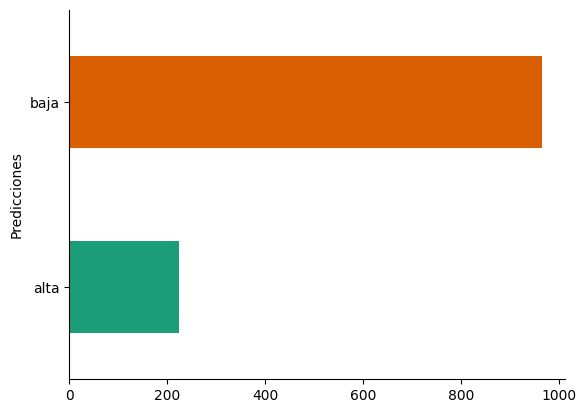

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
df_predicciones.groupby('Predicciones').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Se observan muchas mas instancias de baja energia que de alta energía.
Esto podría tener sentido por dos razones. Primero si los datos de competición son similares a los de entrenamiento al balence de datos es ese, ya que había 4 veces mas datos de energía baja que de alta proximandamente. La otra razón es que el modelo al haber sido etrenado con muchos mas datos de energía baja en las predicciones este sesgada por éstos datos(los de entrenamiento).

Como comclusion cabe destacar que se opto por usar el balanced_accuracy porque el problena no estaba balanceado, y el f1 score nos estaba dando problemas porque devolvia nan.

# ChatGPT


Cabe destacar que a lo largo del documento s eha ido nombrando las diferntes labores de chat gpt pero aqui se hará un breve resumen de sus principales aportaciones.

Por último se hará una breve explicación de los diferentes usos que tuvo ChatGPT durante el desarrollo de la práctica. Ha sido fundamental en la misma. Su principal función fue la de asistente para buscar formas concretas de funciones de sklearn y para depurar. Se le enseñaba el error obtenido y algunas veces(no siempre) te explicaba que estaba pasando. Hay que recordar que es una inteligencia artificial y como tal no tiene la verdad absoluta, por lo que estábamos obligados a poner nuestro propio criterio y verificar algunas salidas de esté. Por ejemplo un uso frecuente que se le encontró fue el de mandarle a ChatGPT a hacer los Param_grid para GRisSearch, sin embargo estábamos obligados a garantizar que los parámetros dados y sus valores eran los correctos. Ésto, como no podría ser de otra forma, se buscaba en la página oficial de scikit-learn.

Cuando no se sabia como funcionaban algunos metodos que devolvieron muchas veces tambien se uso ChatGPT como fuente de informacion. Por ejemplo Para saber el correcto funcionamiento de GridSearch antes de utilizarlo se preguntaba por sus métodos y cómo funcionaba cada uno. Estos era best_params_, o best_estimer_ entre otros por ejemplo.